In [37]:
# importing required libraries
import numpy as np
from glob import glob
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model

In [2]:
# !unzip "/content/drive/MyDrive/projects/cotton leaf disease/data-20210119T193858Z-001.zip" -d "/content"

In [21]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/data/train'
valid_path = '/content/data/val'
test_path = '/content/data/test'

In [22]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [23]:
# not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [24]:
  # useful for getting number of output classes
folders = glob(train_path+'/*')

In [25]:
folders

['/content/data/train/fresh cotton leaf',
 '/content/data/train/fresh cotton plant',
 '/content/data/train/diseased cotton leaf',
 '/content/data/train/diseased cotton plant']

In [26]:
# flattening inception output
x = Flatten()(inception.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [28]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [29]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 40s 555ms/step - loss: 5.2876 - accuracy: 0.5810 - val_loss: 0.9696 - val_accuracy: 0.8426
Epoch 2/20
61/61 [==============================] - 32s 531ms/step - loss: 0.6130 - accuracy: 0.9002 - val_loss: 0.8419 - val_accuracy: 0.8488
Epoch 3/20
61/61 [==============================] - 32s 529ms/step - loss: 0.5511 - accuracy: 0.8992 - val_loss: 0.4397 - val_accuracy: 0.9321
Epoch 4/20
61/61 [==============================] - 32s 530ms/step - loss: 0.4470 - accuracy: 0.9185 - val_loss: 0.5752 - val_accuracy: 0.9198
Epoch 5/20
61/61 [==============================] - 32s 532ms/step - loss: 0.4557 - accuracy: 0.9175 - val_loss: 0.5983 - val_accuracy: 0.9167
Epoch 6/20
61/61 [==============================] - 32s 529ms/step - loss: 0.4514 - accuracy: 0.9230 - val_loss: 0.3631 - val_accuracy: 0.9352
Epoch 7/20
61/61 [==============================] - 32s 528ms/step - loss: 0.3820 - accuracy: 0.9442 - val_loss: 0.2815 - val_accuracy: 0.9660

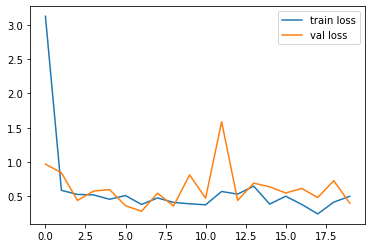

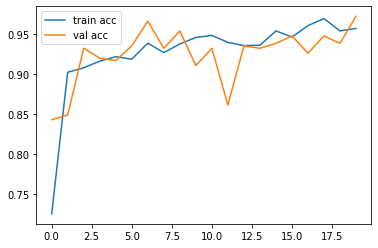

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')